In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import warnings
warnings.filterwarnings("ignore")

# Scikit-learn for traditional ML
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Traditional ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Gradient Boosting frameworks
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers

2024-08-03 18:19:25.872207: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 18:19:25.872325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 18:19:26.003377: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.select_dtypes("object").nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
#Drop low and high cardinality
df.drop(columns= ['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','veil-type'],inplace= True)

In [10]:
(df.isna().sum()) / len(df)


class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
odor                        0.0
gill-color                  0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [11]:
df

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,p,k,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,a,k,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,l,n,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,p,n,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,n,k,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,y,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,n,y,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,n,n,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,y,b,?,s,k,w,w,w,o,e,w,v,l


In [12]:
df_habitat = df["habitat"].groupby(df["class"]).value_counts(normalize=True).rename("frequency").to_frame().reset_index()

df_habitat

,class,habitat,frequency
0,e,d,0.446768
1,e,g,0.334601
2,e,m,0.060837
3,e,l,0.057034
4,e,w,0.045627
5,e,p,0.032319
6,e,u,0.022814
7,p,d,0.323800
8,p,p,0.257406
9,p,g,0.188968


In [13]:
# Create bar plot
fig = px.bar(df_habitat, x='habitat', y='frequency', color='class', barmode='group',
             labels={'habitat': 'Habitat', 'frequency': 'Frequency (%)'},
             title="Habitat Distribution: Edible Vs Poisonous")

# Show plot
fig.show()

In [14]:
df_popu = df['population'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_popu

,class,population,frequency
0,e,v,0.283270
1,e,y,0.252852
2,e,s,0.209125
3,e,n,0.095057
4,e,a,0.091255
5,e,c,0.068441
6,p,v,0.727273
7,p,y,0.165475
8,p,s,0.093973
9,p,c,0.013279


In [15]:
## Let`s create a bar plot to show the population: Edible Vs Poisonous

fig = px.bar(data_frame= df_popu , x= 'population', y= 'frequency',color= 'class', barmode= 'group', title='population: Edible Vs Poisonous')
fig.update_layout(xaxis_title= 'population' , yaxis_title= 'frequenncy(%)')

In [16]:
#Define dictionary to replace the values ['n','o','t'] to [1 , 2 , Zero] to make it readable
ring_num = {
    'o': 1,
    't': 2,
    'n':0
}
ring_num

{'o': 1, 't': 2, 'n': 0}

In [17]:
df_ring = df['ring-number'].replace(ring_num).groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_ring

,class,ring-number,frequency
0,e,1,0.874525
1,e,2,0.125475
2,p,1,0.972421
3,p,2,0.018386
4,p,0,0.009193


In [18]:
#Let`s create a barchart to visualize the number of rings in each class
fig = px.bar(data_frame= df_ring , x = 'ring-number' , y= 'frequency' , color = 'class' , barmode= 'group',title= 'Number of rings: Edible Vs Poisonous')
fig.update_layout(xaxis_title= 'number of rings' , yaxis_title = 'frequency (%)')

In [19]:
# Pie chart for habitat distribution
fig_pie = px.pie(df,names="habitat",title="Habitat Distribution")
fig_pie.show()

In [20]:
# Histogram for cap-color distribution
fig_histogram = px.histogram(df, x='cap-color', color='class', title='Cap Color Distribution: Edible vs Poisonous')
fig_histogram.show()

In [21]:
# Donut chart for odor distribution
fig_donut = px.pie(df, names='odor', hole=0.3, title='Odor Distribution')
fig_donut.show()

In [22]:
# Scatter plot for population vs habitat colored by class
fig_scatter = px.scatter(df, x='population', y='habitat', color='class', title='Population vs Habitat: Edible vs Poisonous')
fig_scatter.show()

In [23]:
X = df.drop(['class'],axis=1)
y = df['class']

In [24]:
X = pd.get_dummies(X)
# Convert all columns to integer type (0 and 1)
X = X.astype(int)

X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
X.shape

(8124, 106)

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [28]:
X_train.shape , X_test.shape

((5686, 106), (2438, 106))

In [29]:
y_train.shape , y_test.shape

((5686,), (2438,))

In [30]:
# Initialize models with parameters
lr = LogisticRegression(random_state=42, max_iter=1000)
dtc = DecisionTreeClassifier(random_state=42)
rtc = RandomForestClassifier(random_state=42)
xgbc = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
gbc = GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
naive = GaussianNB()
lgb = LGBMClassifier(random_state=42)

# List of models
models_ml = [lr, dtc, rtc, xgbc, gbc, svc, naive, lgb]

# Names of models
names = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier",
         "XGBoost Classifier", "Gradient Boosting Classifier",
         "Support Vector Machine Classifier", "Naive Bayes", "Light Gradient Boosting Classifier"]

In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Logistic Regression
Accuracy:  0.9995898277276456
Confusion Matrix:
[[1257    0]
 [   1 1180]]


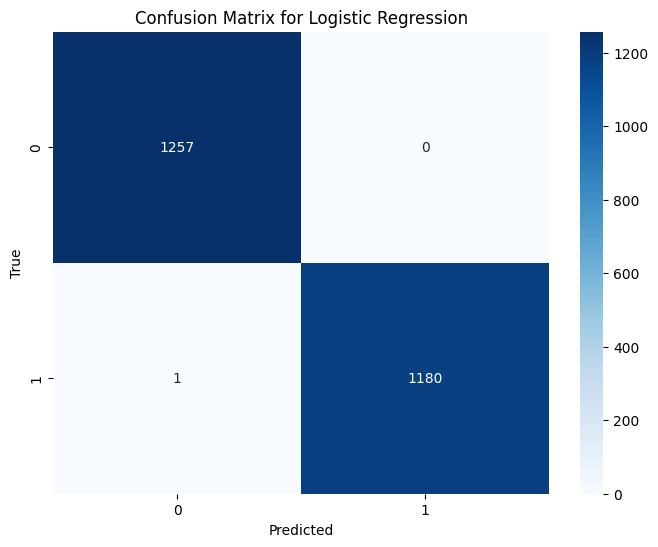

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

--------------------------------------------------
Decision Tree Classifier
Accuracy:  1.0
Confusion Matrix:
[[1257    0]
 [   0 1181]]


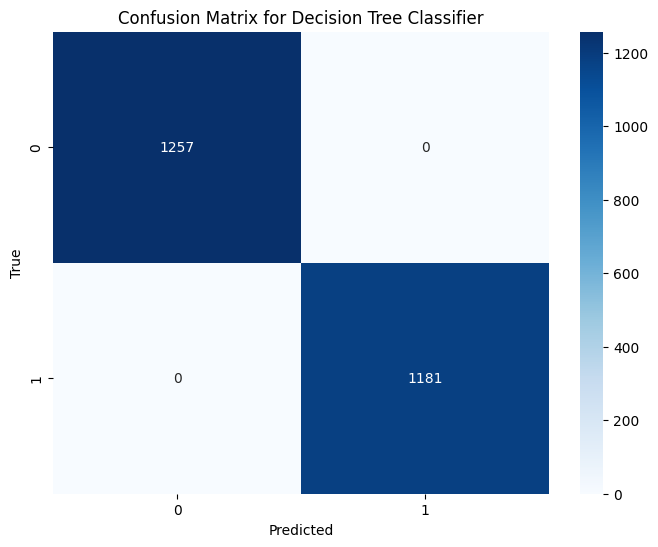

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

--------------------------------------------------
Random Forest Classifier
Accuracy:  1.0
Confusion Matrix:
[[1257    0]
 [   0 1181]]


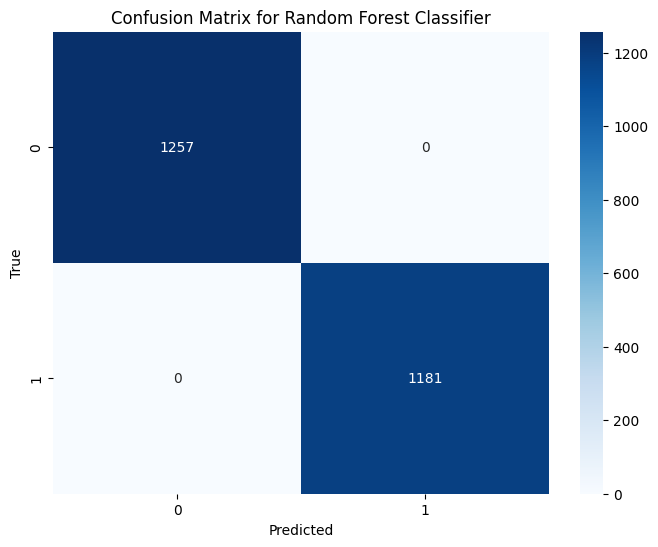

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

--------------------------------------------------
XGBoost Classifier
Accuracy:  1.0
Confusion Matrix:
[[1257    0]
 [   0 1181]]


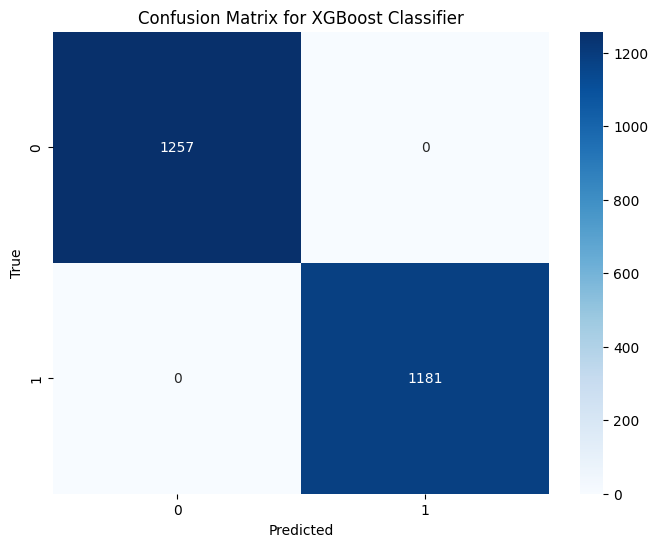

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

--------------------------------------------------
Gradient Boosting Classifier
Accuracy:  1.0
Confusion Matrix:
[[1257    0]
 [   0 1181]]


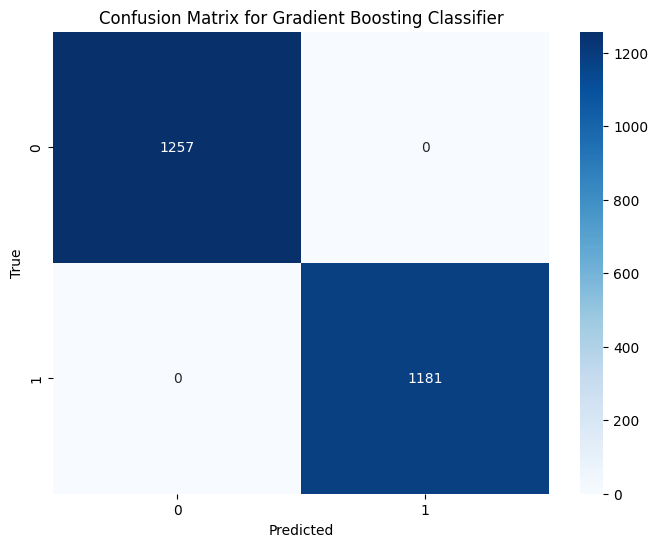

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

--------------------------------------------------
Support Vector Machine Classifier
Accuracy:  1.0
Confusion Matrix:
[[1257    0]
 [   0 1181]]


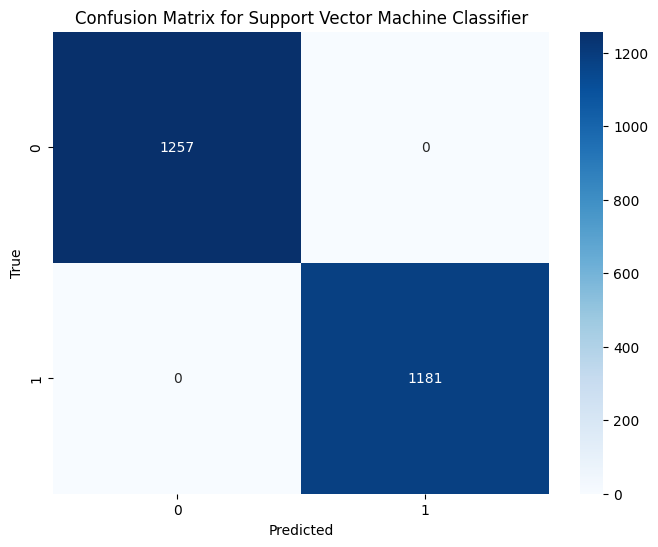

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

--------------------------------------------------
Naive Bayes
Accuracy:  0.9515996718621821
Confusion Matrix:
[[1140  117]
 [   1 1180]]


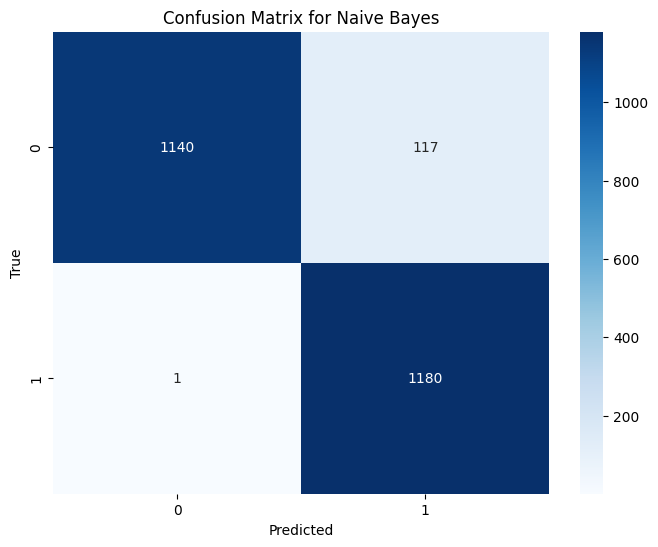

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1257
           1       0.91      1.00      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.96      0.95      0.95      2438

--------------------------------------------------
[LightGBM] [Info] Number of positive: 2735, number of negative: 2951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 5686, number of used features: 97
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.481006 -> initscore=-0.076013
[LightGBM] [Info] Start training from score -0.076013
[LightGBM] [Warning] No further splits with p

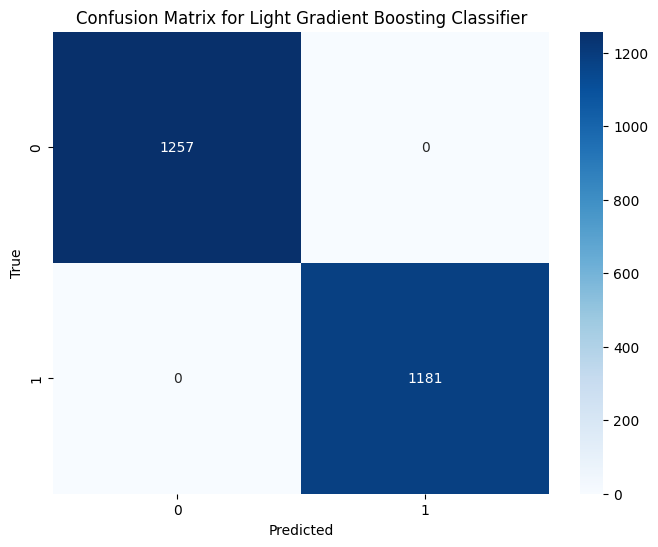

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

--------------------------------------------------


In [32]:
index = 0
accuracies = []
confusion_matrices = []
classification_reports = []

for name, model in zip(names, models_ml):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    pred = model.predict(X_test)
    
    print(f'{name}')
    
    # Compute classification metrics
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    class_report = classification_report(y_test, pred)
    
    accuracies.append(accuracy)
    confusion_matrices.append(conf_matrix)
    classification_reports.append(class_report)
    
    print("Accuracy: ", accuracy)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print("Classification Report:")
    print(class_report)
    print("-" * 50)

    index += 1

In [33]:
from keras.layers import Input
# Initialising the ANN
classifier = Sequential()
classifier.add(Input(shape=(X_train.shape[1],)))
# Adding first hidden layer
classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the second hidden layer
classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.astype('float64'), batch_size = 32, epochs = 3) #ValueError if y_train datatype not changed

Epoch 1/3
110/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8848 - loss: 0.5466

I0000 00:00:1722709186.608147     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9080 - loss: 0.4437
Epoch 2/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9985 - loss: 0.0126
Epoch 3/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0027


In [35]:
# Predicting the Train set results
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5) #50% threshold
# Predicting the Test set results
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5) #50% threshold

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
#Displaying model's performance on Train and Test set
print("ANN Model's performance on Train, and Test set:")
print(f"The model's accuracy on the training set is: {accuracy_score(y_train.astype('bool'),y_pred_train)*100}%")
print(f"The model's accuracy on the test set is: {accuracy_score(y_test.astype('bool'),y_pred_test)*100}%\n")
print(f"The model's classification report on the test set\n {classification_report(y_test.astype('bool'),y_pred_test)}")

ANN Model's performance on Train, and Test set:
The model's accuracy on the training set is: 100.0%
The model's accuracy on the test set is: 100.0%

The model's classification report on the test set
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1257
        True       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Accuracy:  1.0
Confusion Matrix:
[[1257    0]
 [   0 1181]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



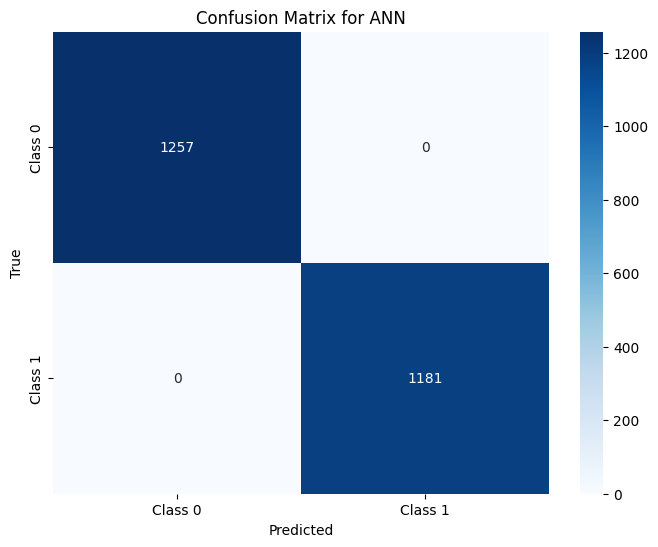

In [37]:
# Compute metrics
accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred, output_dict=True)

# Print metrics
print("Accuracy: ", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()